In [1]:
import sys
import os
nb_dir = os.path.split(os.getcwd())[0]
sys.path.append(os.getcwd() + "/../")

In [2]:
import bertft

In [3]:
# Important: auto-reload of bertft module
%load_ext autoreload
%autoreload 2

In [4]:
pipeline = bertft.Pipeline(True)

Initializing fast text
Found existing model, loading.


Loading bert
Server started in 15.4336 seconds


Input:  what's the local weather# forecast?
Unfiltered top:
             word   bert normalized ftext score
0         weather  60.77       1.00  1.00  2.00
1            snow  57.66       0.63  0.54  1.17
2            rain  56.78       0.53  0.60  1.12
3     temperature  57.65       0.63  0.48  1.11
4        rainfall  56.91       0.54  0.50  1.04
5           storm  56.07       0.44  0.57  1.02
6          winter  55.84       0.41  0.60  1.01
7        forecast  56.02       0.44  0.55  0.98
8         traffic  56.52       0.50  0.44  0.94
9   precipitation  56.41       0.48  0.40  0.89
10           heat  55.66       0.39  0.46  0.85
11        tornado  55.60       0.39  0.41  0.80
12        weekend  55.36       0.36  0.41  0.77
13        heating  55.46       0.37  0.38  0.75
14           fire  55.55       0.38  0.36  0.74
15           news  55.23       0.34  0.39  0.73
16        driving  55.65       0.39  0.32  0.71
17        fishing  55.46       0.37  0.34  0.71
18        eclipse  55.68    

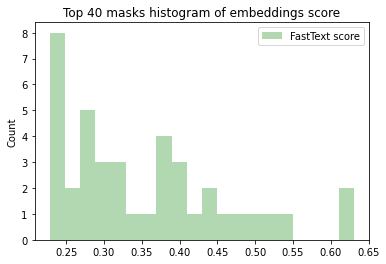

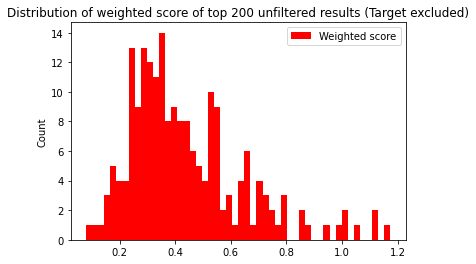

Original word position:  None ; score:  60.76640701293945
Finished in 0.1776 seconds


,word,bert,normalized,ftext,score
0,weather,60.77,1.00,1.00,2.00
1,snow,57.66,0.63,0.54,1.17
2,rain,56.78,0.53,0.60,1.12
3,temperature,57.65,0.63,0.48,1.11
4,rainfall,56.91,0.54,0.50,1.04
5,storm,56.07,0.44,0.57,1.02
6,winter,55.84,0.41,0.60,1.01
7,forecast,56.02,0.44,0.55,0.98
8,traffic,56.52,0.50,0.44,0.94
9,precipitation,56.41,0.48,0.40,0.89


In [5]:
# Example of usage
pipeline.find_top(
    "what's the local weather# forecast?", # mark target word with $ 
    # For wordnet add lexname after question mark (i.e. "n" -- noun, "v" -- verb, "a" -- adjective)
    k = 20, # Filter best k results (by weighted score)
    top_bert = 200, # Number of initial filter of bert output 
    bert_norm = 200, # Use this position for normalization of bert output 
    min_ftext = 0.3, # Minimal required score of fast text  
    weights = [ # Weights of models scores to calculate total weighted score
        1, # bert
        1, # fast text
    ]
)
